In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns

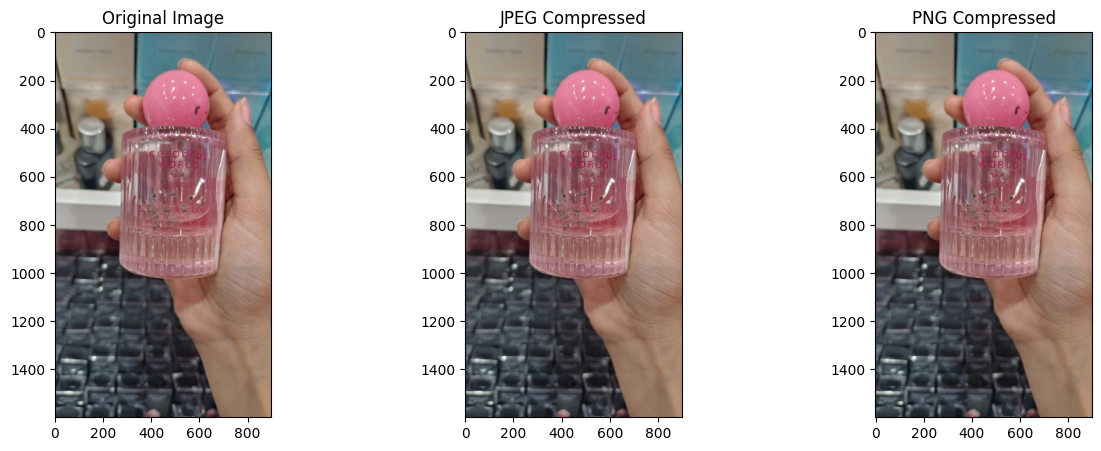

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in RGB format
image = cv2.imread('/content/img4.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Task 1.1: Lossy Compression (JPEG)
cv2.imwrite('compressed_image.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 50])

# Task 1.2: Lossless Compression (PNG)
cv2.imwrite('compressed_image.png', cv2.cvtColor(image, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION, 9])


# *Function to apply DCT to each channel separately*
def apply_dct_color(image):
    image_float = np.float32(image) / 255.0  # Normalize pixel values (0-1)
    dct_channels = []

    # Apply DCT to each color channel (R, G, B)
    for i in range(3):  # 3 Channels: R, G, B
        dct = cv2.dct(image_float[:, :, i])  # Apply DCT
        idct = cv2.idct(dct)  # Apply Inverse DCT (IDCT)
        dct_channels.append(idct)

    # Stack the processed channels back into an image
    dct_image = np.dstack(dct_channels)  # Merge R, G, B channels
    dct_image = np.clip(dct_image, 0, 1)  # Clip values to valid range
    return (dct_image * 255).astype(np.uint8)  # Convert back to 8-bit image


# Apply DCT to color image
dct_reconstructed = apply_dct_color(image)

# *Display Images*
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(plt.imread('compressed_image.jpg'))
axs[1].set_title('JPEG Compressed')
axs[1].axis('off')

axs[2].imshow(plt.imread('compressed_image.png'))
axs[2].set_title('PNG Compressed')
axs[2].axis('off')

axs[3].imshow(dct_reconstructed)
axs[3].set_title('DCT Reconstructed')
axs[3].axis('off')

plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8691 - loss: 0.4166 - val_accuracy: 0.9806 - val_loss: 0.0661
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9823 - loss: 0.0582 - val_accuracy: 0.9843 - val_loss: 0.0562
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9891 - loss: 0.0377 - val_accuracy: 0.9877 - val_loss: 0.0426
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9925 - loss: 0.0245 - val_accuracy: 0.9886 - val_loss: 0.0431
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9901 - val_loss: 0.0415
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9888 - val_loss: 0.0387
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 76s 52ms/step - accuracy: 0.9962 - loss: 0.0107 - val_accuracy: 0.9891 - val_loss: 0.0454
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.9977 - loss: 0.0074 - 

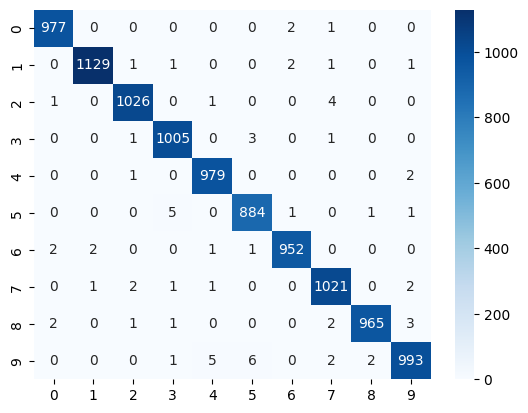

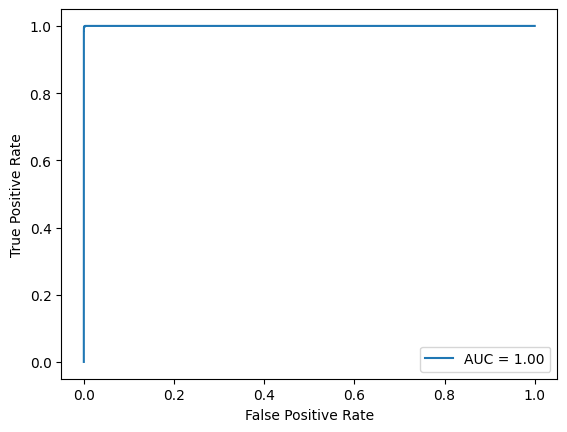

In [ ]:
# Task 2: CNN on MNIST

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and Train Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=64)

# Evaluate Model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_classes))
conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.show()

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.3509 - loss: 1.7717 - val_accuracy: 0.5422 - val_loss: 1.2912
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.5707 - loss: 1.2135 - val_accuracy: 0.6101 - val_loss: 1.1268
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6340 - loss: 1.0494 - val_accuracy: 0.6470 - val_loss: 1.0288
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.6736 - loss: 0.9420 - val_accuracy: 0.6613 - val_loss: 0.9751
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.7050 - loss: 0.8554 - val_accuracy: 0.6710 - val_loss: 0.9574
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - accuracy: 0.7184 - loss: 0.7984 - val_accuracy: 0.6836 - val_loss: 0.9262
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7427 - loss: 0.7362 - val_accuracy: 0.6881 - val_loss: 0.9191
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.7682 - loss: 0.6687 - 

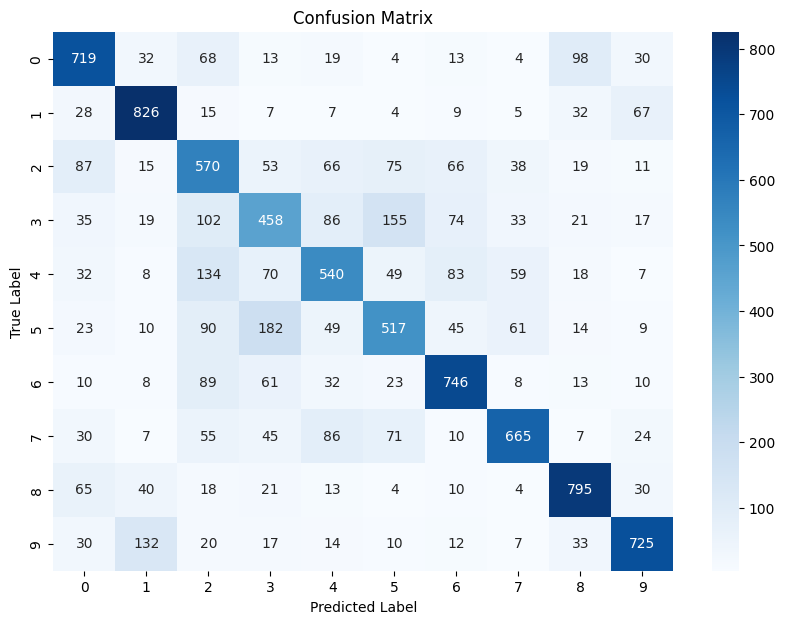

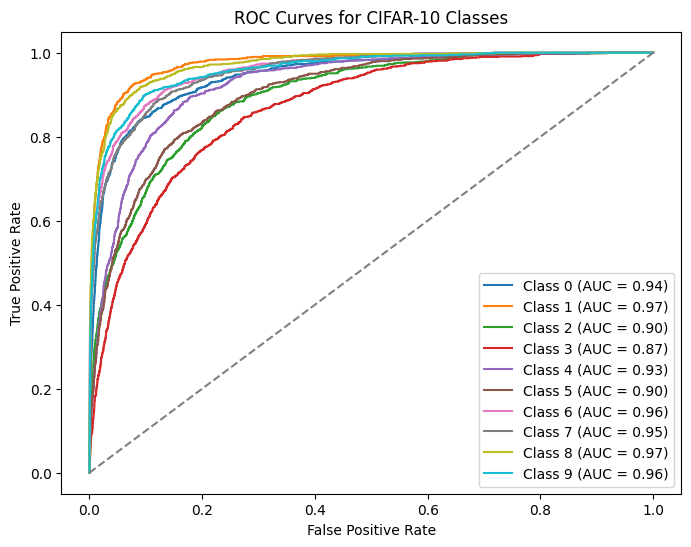

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile and Train Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=64)

# Evaluate Model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(10):  # Loop through all 10 classes
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for CIFAR-10 Classes")
plt.legend()
plt.show()
